# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Auto-sklearn applied to classification and regression



# Import modules
<hr style="border:2px solid black"> </hr>

In [7]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from autosklearn.classification import AutoSklearnClassifier
from sklearn.metrics import mean_absolute_error
from autosklearn.regression import AutoSklearnRegressor
from autosklearn.metrics import mean_absolute_error as auto_mean_absolute_error

# Auto-Sklearn
<hr style="border:2px solid black"> </hr>


- Auto-Sklearn performs AutoML which referes to techniques for automatically discovering well-performing models.

- It is based on Scikit-Learn and uses a **Bayesian Optimization** search procedure to efficiently discover a top-performing model pipeline for a given dataset. 



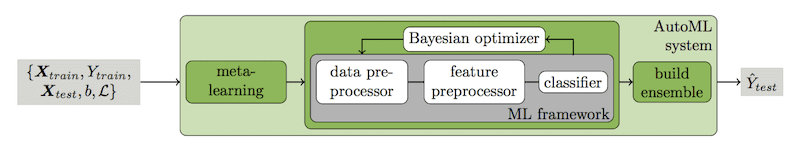

# Load datasets
<hr style="border:2px solid black"> </hr>

In [ ]:
# Dataset for classfication
dataframeSonar = read_csv('../Datasets/sonar.csv', header=None)

# Dataset for regression
dataframeInsutance = read_csv('../DATASETS/auto-insurance.csv', header=None)

# Classification
<hr style="border:2px solid black"> </hr>

In [ ]:
# split into input and output elements
data = dataframeSonar.values
X, y = data[:, :-1], data[:, -1]

# minimally prepare dataset
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [3]:
# define search
model = AutoSklearnClassifier(time_left_for_this_task=5*60, per_run_time_limit=30, n_jobs=8)
# perform the search
model.fit(X_train, y_train)
# summarize
print(model.sprint_statistics())
# evaluate best model
y_hat = model.predict(X_test)
acc = accuracy_score(y_test, y_hat)
print("Accuracy: %.3f" % acc)

auto-sklearn results:
  Dataset name: e6de0ef2-2cc9-11ec-9776-d2003c69cd01
  Metric: accuracy
  Best validation score: 0.891304
  Number of target algorithm runs: 103
  Number of successful target algorithm runs: 100
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 0

Accuracy: 0.841


# Regression
<hr style="border:2px solid black"> </hr>

In [ ]:
# split into input and output elements
data = dataframeInsurance.values
data = data.astype('float32')
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [9]:
# define search
model = AutoSklearnRegressor(time_left_for_this_task=5*60, per_run_time_limit=30, n_jobs=8,
                            metric=auto_mean_absolute_error)
# perform the search
model.fit(X_train, y_train)
# summarize
print(model.sprint_statistics())
# evaluate best model
y_hat = model.predict(X_test)
mae = mean_absolute_error(y_test, y_hat)
print("MAE: %.3f" % mae)

auto-sklearn results:
  Dataset name: 6b9a3a70-2ccb-11ec-9776-d2003c69cd01
  Metric: mean_absolute_error
  Best validation score: 30.169460
  Number of target algorithm runs: 76
  Number of successful target algorithm runs: 70
  Number of crashed target algorithm runs: 6
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0

MAE: 51.752


# References
<hr style="border:2px solid black"> </hr>


- https://machinelearningmastery.com/auto-sklearn-for-automated-machine-learning-in-python/
- [AutoSklearnRegressor API](https://automl.github.io/auto-sklearn/master/api.html)

